In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing

print("pandas version: {}".format(pd.__version__))
print("seaborn version: {}".format(sns.__version__))
print("numpy version: {}".format(np.__version__))

pandas version: 1.0.3
seaborn version: 0.10.0
numpy version: 1.18.1


In [2]:
data = pd.read_csv("./Tut51Q3.csv")
data.head()

,Company,X1,X2
0,Citgroup,108.28,17.05
1,General Electric,152.36,16.59
2,AIG,95.04,10.91
3,Bank of America,65.45,14.14
4,HSBC Group,62.97,9.52


Data on $X_1$ = sales and $X_2$ = profits for 10 large companies in the world are obtained as follow:

In [3]:
data

,Company,X1,X2
0,Citgroup,108.28,17.05
1,General Electric,152.36,16.59
2,AIG,95.04,10.91
3,Bank of America,65.45,14.14
4,HSBC Group,62.97,9.52
5,ExxonMobil,263.99,25.33
6,Royal Dutch/Shell,265.19,18.54
7,BP,285.06,15.73
8,ING Group,92.01,8.10
9,Toyota Motor,165.68,11.13


In [4]:
data_reduced = data.drop(['Company'], axis = 1)
data_reduced

,X1,X2
0,108.28,17.05
1,152.36,16.59
2,95.04,10.91
3,65.45,14.14
4,62.97,9.52
5,263.99,25.33
6,265.19,18.54
7,285.06,15.73
8,92.01,8.10
9,165.68,11.13


They have the following sample mean and sample covariance matrix:<br>

$\bar{x}= \begin{bmatrix}155.60  \\14.70  \end{bmatrix}  
\mathbf{C} = 
\begin{bmatrix}{}
7476.45 & 303.62 \\
303.62 & 26.19\\
\end{bmatrix}$

**(a) Using the sample covariance matrix C,**

**(i) determine the two principal components and their eigenvalues.**

In [5]:
pca = PCA(n_components=2).fit(data_reduced)
# Note that pca.transform() returns scores based on centred data
pca_samples = pca.transform(data_reduced)

In [6]:
# Computes the PCs and percentage variance explained
# Pass original data and returns of PCA to this function.
# This function returns a table summarising the PCs, eigenvalues and percentage variance explained.
# The eigenvalues obtained may sometimes be slightly different due to difference in method.

def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    #PCA eigenvalues
    ev = pca.explained_variance_.reshape(len(pca.components_), 1)
    eigenvalues = pd.DataFrame(np.round(ev, 4), columns = ['Eigenvalue']) 
    eigenvalues.index = dimensions
    
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # Return a concatenated DataFrame
    return pd.concat([eigenvalues, variance_ratios, components], axis = 1)

In [7]:
pca_result = pca_results(data_reduced, pca)
pca_result

,Eigenvalue,Explained Variance,X1,X2
PC 1,7488.8061,0.9982,0.9992,0.0407
PC 2,13.8375,0.0018,-0.0407,0.9992


The principal components of $C$ are<br>
$\hat{y_1}  = 0.999x_1 + 0.041x_2$<br>
$\hat{y_2}  = -0.041x_1 + 0.999x_2$<br>
and their eigenvalues are $\lambda_1 = 7488.8$ and $\lambda_2 = 13.8$

**(ii) find the percentage of total variance explained by each principal component.**

The percentage of total variance explained by $PC_1$ is $99.82\%$ and the percentage total variance explained by $PC_2$ is $0.18\%$

**(iii) Create a scatterplot of the data. Indicate the directions of the principal components obtained on your scatterplot.**

Text(0.5, 1.0, 'Scatter Plot of X1 and X2')

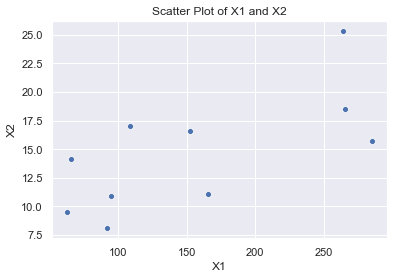

In [36]:
ax1 = sns.scatterplot(x="X1", y="X2", data=data_reduced)
plt.title("Scatter Plot of X1 and X2")

In [43]:
# This function plots the loading plot.
# Pass original data dataframe and returns of PCA to this function. Optional width, height and margin
# This function returns the axes of the loading plot

def loadingplot(data, pca, width=5, height=5, margin=0.5):

    fig, ax = plt.subplots(figsize = (width,height))

    #Set limits for figure
    x_min = min(pca.components_[0,:].min(),0)-margin
    x_max = max(pca.components_[0,:].max(),0)+margin
    y_min = min(pca.components_[1,:].min(),0)-margin
    y_max = max(pca.components_[1,:].max(),0)+margin

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    #Scaling factor for text position
    text_pos = 0.1

    for i, v in enumerate(pca.components_.T):
        print(v)
        ax.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.1, linewidth=2, color='red')
        ax.text(v[0], v[1]+text_pos, data.columns[i], color='black', ha='center', va='center', fontsize=12)

    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    ax.set_xlabel("PC1", fontsize=14)
    ax.set_ylabel("PC2", fontsize=14)
    ax.set_title("Loading plot", fontsize = 14)
    
    return ax

[ 0.99917338 -0.04065165]
[0.04065165 0.99917338]


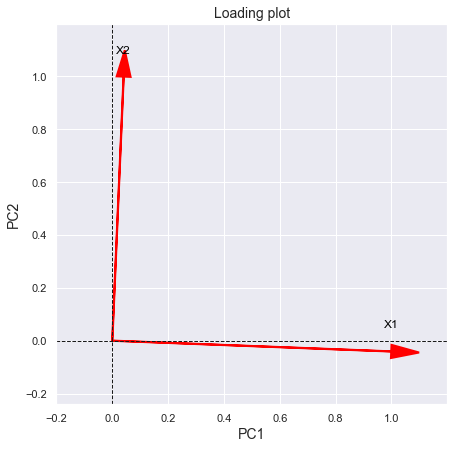

In [44]:
ax2 = loadingplot(data_reduced, pca, width=7, height=7, margin=0.2)
plt.show()

In [68]:
# This function plots the biplot.
# Pass centred scores dataframe and returns of PCA to this function. Optional width, height and margin
# This function returns the axes of the loading plot

def biplot(scores, data, pca, width=5, height=5, margin=0.5, title="Biplot", text_pos=0.5):
    plt.figure(figsize=(width, height))
    ax = sns.scatterplot(x='PC1', y='PC2', data = scores)

    #Set margins and limits for figure
    x_min = min(scores['PC1'].min(), pca.components_[0,:].min(), 0) - margin
    x_max = max(scores['PC1'].max(), pca.components_[0,:].max(), 0) + margin
    y_min = min(scores['PC2'].min(), pca.components_[1,:].min(), 0) - margin
    y_max = max(scores['PC2'].max(), pca.components_[1,:].max(), 0) + margin

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title(title, fontsize=14)

    #Scaling factor for text position
    text_pos = text_pos

    for i, v in enumerate(pca.components_.T):
        ax.arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.1, linewidth=2, color='red')
        ax.text(v[0], v[1]+text_pos, data.columns[i], color='black', ha='center', va='center', fontsize=12)

    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    return ax

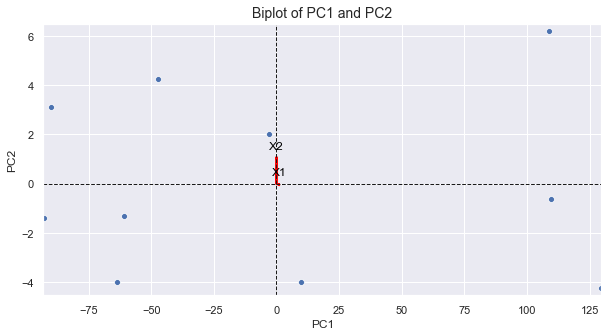

In [69]:
scores_centred = pd.DataFrame(pca_samples, columns = ['PC1', 'PC2'])
ax3 = biplot(scores_centred, data_reduced, pca, width=10, height=5, margin=0.3, title="Biplot of PC1 and PC2")
plt.show()

**(b) Compute the sample correlation matrix R of the data. Then,**

In [11]:
mean = np.array([155.6, 14.7])
cov = np.array([[7476.45, 303.62], [303.62, 26.19]])
# sample correlation matrix
R = np.corrcoef(data_reduced, rowvar=0)
R

array([[1.        , 0.68613603],
       [0.68613603, 1.        ]])

In [12]:
z = (data_reduced - mean)/data_reduced.std()
z.columns = ['Z1', 'Z2']
z

,Z1,Z2
0,-0.547264,0.459195
1,-0.037471,0.369310
2,-0.700387,-0.740575
3,-1.042600,-0.109425
4,-1.071282,-1.012184
5,1.253549,2.077126
6,1.267427,0.750345
7,1.497227,0.201264
8,-0.735429,-1.289655
9,0.116577,-0.697586


**(i) determine the two principal components and their eigenvalues.**

In [13]:
pca2 = PCA(n_components=2).fit(z)
# Note that pca.transform() returns scores based on centred data
pca2_samples = pca2.transform(z)

In [14]:
pca2_result = pca_results(data_reduced, pca2)
pca2_result

,Eigenvalue,Explained Variance,X1,X2
PC 1,1.6861,0.8431,0.7071,0.7071
PC 2,0.3139,0.1569,0.7071,-0.7071


The principal components of $C$ are<br>
$\hat{y_1}  = 0.707x_1 + 0.707x_2$<br>
$\hat{y_2}  = -0.707x_1 + 0.707x_2$<br>
and their eigenvalues are $\lambda_1 = 1.686$ and $\lambda_2 = 0.314$

**(ii) find the percentage of total variance explained by each principal component.**

The percentage of total variance explained by $PC_1$ is $84.31\%$ and the percentage total variance explained by $PC_2$ is $15.69\%$

**(iii) Create a scatterplot of the data. Indicate the directions of the principal components obtained on your scatterplot.**

Text(0.5, 1.0, 'Scatter Plot of Z1 and Z2')

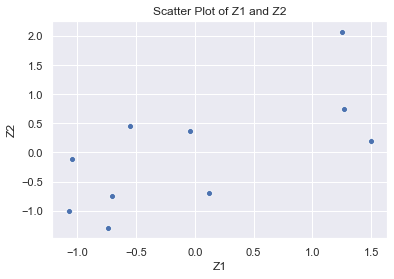

In [45]:
ax4 = sns.scatterplot(x="Z1", y="Z2", data=z)
plt.title("Scatter Plot of Z1 and Z2")

[0.70710678 0.70710678]
[ 0.70710678 -0.70710678]


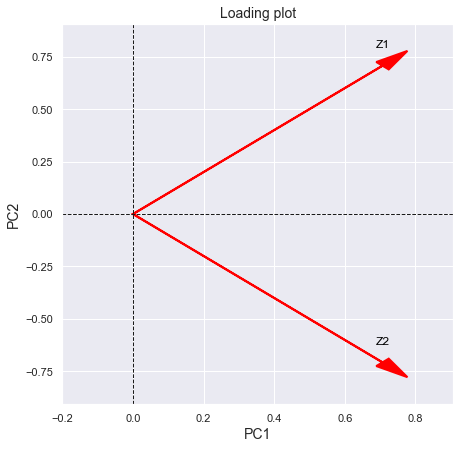

In [46]:
ax5 = loadingplot(z, pca2, width=7, height=7, margin=0.2)
plt.show()

In [49]:
z_centred = pd.DataFrame(pca2_samples, columns = ['PC1', 'PC2'])

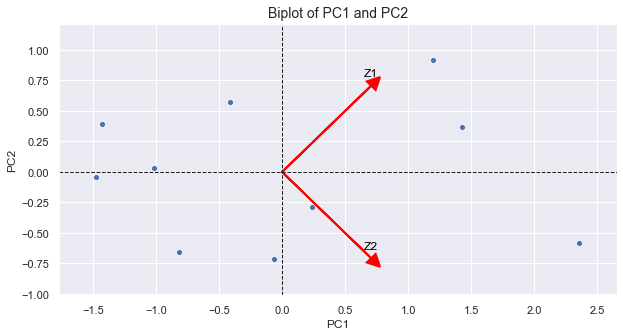

In [71]:
ax6 = biplot(z_centred, z, pca2, width=10, height=5, margin=0.3, title="Biplot of PC1 and PC2", text_pos=0.1)
plt.show()

**(c) Compare your results obtained in parts (a) and (b).**

Using covariance matrix, the percentage of total variance explained by $PC_1$ is $99.82\%$ and the percentage total variance explained by $PC_2$ is $0.18\%$. Meanwhile, when we use correlation matrix, the percentage of total variance explained by $PC_1$ is $84.31\%$ and the percentage total variance explained by $PC_2$ is $15.69\%$